In [49]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("train.csv")

print("Shape of train dataset: ",data.shape)
print("Data type in train dataset:\n",data.dtypes)

data.head()


Shape of train dataset:  (14999, 9)
Data type in train dataset:
 vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,F
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,D
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,C
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,H
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,D


In [50]:
## converting categorical alphabet column into numeric for easy to use  
int_cat={'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
data["category"]=data["category"].map(int_cat)

## for removing unknown value in dataset
data=data[data.views!="F"]
data=data[data.likes!="F"]
data=data[data.dislikes!="F"]
data=data[data.comment!="F"]

## converting remaning convertible column into numeric 
data["views"]=pd.to_numeric(data["views"])
data["likes"]=pd.to_numeric(data["likes"])
data["dislikes"]=pd.to_numeric(data["dislikes"])
data["comment"]=pd.to_numeric(data["comment"])
print(data.shape)
data.dtypes

(14637, 9)


vidid        object
adview        int64
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category      int64
dtype: object

In [51]:
## giving int value(label) to each specific date
from sklearn.preprocessing import LabelEncoder
data["published"]=LabelEncoder().fit_transform(data["published"])
print(data.dtypes)
data.head()

vidid        object
adview        int64
views         int64
likes         int64
dislikes      int64
comment       int64
published     int32
duration     object
category      int64
dtype: object


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,1090,PT7M37S,6
1,VID_14135,2,1707,56,2,6,64,PT9M30S,4
2,VID_2187,1,2023,25,0,2,122,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2088,PT4M22S,8
4,VID_10175,1,666,1,0,0,2233,PT31S,4


In [52]:
## Making function to convert any time into second 
#.......use to convert string duration column into numeric duration column
#
import time
import datetime

def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)


time = (data["duration"].apply(checki)).apply(func_sec)
data["duration"]=time
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,1090,457,6
1,VID_14135,2,1707,56,2,6,64,570,4
2,VID_2187,1,2023,25,0,2,122,136,3
3,VID_23096,6,620860,777,161,153,2088,262,8
4,VID_10175,1,666,1,0,0,2233,31,4


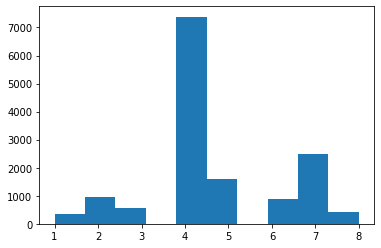

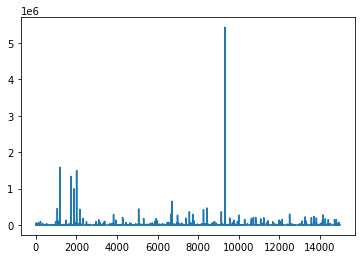

In [53]:
##ploting histogram draph of categorical object i.e. "category"
plt.hist(data["category"])
plt.show()
##ploting plot graph for adview object
plt.plot(data["adview"])
plt.show()

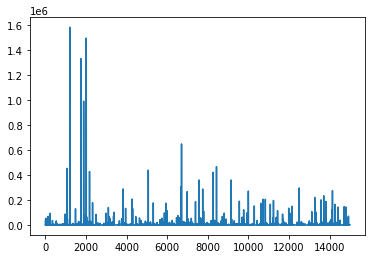

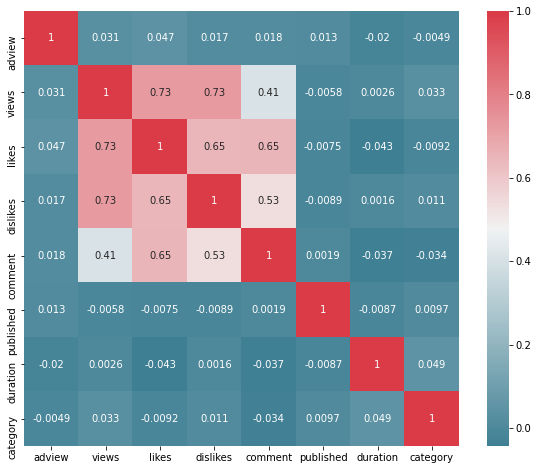

In [54]:
# Removing those point where adview greater than 2000000 as outlier
#
data = data[data["adview"] <2000000]
plt.plot(data["adview"])
plt.show()

# Heatmap
import seaborn as sns
import numpy as np
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot=True)
plt.show()

In [55]:
## Making target object for our training model
y=pd.DataFrame(data=data.iloc[:,1].values,columns=["target"])
data=data.drop(["adview","vidid"],axis=1)

## Spliting the data into train & test form with the 20% size of test data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=.2,random_state=42)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11708 entries, 13440 to 7445
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   views      11708 non-null  int64
 1   likes      11708 non-null  int64
 2   dislikes   11708 non-null  int64
 3   comment    11708 non-null  int64
 4   published  11708 non-null  int32
 5   duration   11708 non-null  int64
 6   category   11708 non-null  int64
dtypes: int32(1), int64(6)
memory usage: 686.0 KB


In [56]:
##Converting input features values in some specific range
#for making easy for calculation in model

from sklearn.preprocessing import MinMaxScaler
X_train_n=MinMaxScaler().fit_transform(x_train)
X_test_n=MinMaxScaler().fit_transform(x_test)

In [57]:
y_test.shape

(2928, 1)

In [58]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
##.........................
#
#
print("linear regression model prediction error:\n")
#by using linear regression model

from sklearn import linear_model
lrm=linear_model.LinearRegression()
lrm.fit(X_train_n,y_train)
print_error(X_test_n,y_test,lrm)
##.................................................................

print("\nSupport Vector Regressor Model prediction error:\n")
#by using Support Vector Regressor

from sklearn.svm import SVR
Svrm=SVR()
Svrm.fit(X_train_n,y_train)
print_error(X_test_n,y_test,Svrm)

##...............................................................

print("\nDecision Tree Regressor Model prediction error:\n")
#Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
dtrm=DecisionTreeRegressor()
dtrm.fit(X_train_n,y_train)
print_error(X_test_n,y_test,dtrm)

##..............................................................

print("\nRandom Forest Regressor Model prediction error:\n")
#
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rfrm = RandomForestRegressor(n_estimators = 200, max_depth = 25, min_samples_split=15,min_samples_leaf=2)
rfrm.fit(X_train_n,y_train)
print_error(X_test_n,y_test, rfrm)
##...................................................................

linear regression model prediction error:

Mean Absolute Error: 3493.3179717888042
Mean Squared Error: 838355049.0604033
Root Mean Squared Error: 28954.361485973117

Support Vector Regressor Model prediction error:



c:\users\aman's notebook\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Mean Absolute Error: 1696.9815596832475
Mean Squared Error: 833685850.6202459
Root Mean Squared Error: 28873.618592414874

Decision Tree Regressor Model prediction error:

Mean Absolute Error: 5578.395491803279
Mean Squared Error: 4600458361.401639
Root Mean Squared Error: 67826.67883216485

Random Forest Regressor Model prediction error:



<ipython-input-58-d3ff68965700>:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfrm.fit(X_train_n,y_train)


Mean Absolute Error: 3407.2672187198245
Mean Squared Error: 870092767.0052228
Root Mean Squared Error: 29497.334913602328


In [59]:
#Artificial Neural Network by using Adam smith optimizer
import keras
from keras.layers import Dense

ann = keras.models.Sequential([Dense(6,activation="relu",
                                     input_shape=X_train_n.shape[1:]),
                               Dense(6,activation="relu"),
                               Dense(1)])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error

ann.compile(optimizer=optimizer,
            loss=loss,
            metrics=["mean_squared_error"])

#..........

history=ann.fit(X_train_n,y_train,epochs=100)
ann.summary()
print_error(X_test_n,y_test,ann)

Epoch 1/100
366/366 [==============================] - 0s 765us/step - loss: 767405568.0000 - mean_squared_error: 767405568.0000
Epoch 2/100
366/366 [==============================] - 0s 762us/step - loss: 767395456.0000 - mean_squared_error: 767395456.0000
Epoch 3/100
366/366 [==============================] - 0s 734us/step - loss: 767376192.0000 - mean_squared_error: 767376192.0000
Epoch 4/100
366/366 [==============================] - 0s 691us/step - loss: 767335360.0000 - mean_squared_error: 767335360.0000
Epoch 5/100
366/366 [==============================] - 0s 729us/step - loss: 767274624.0000 - mean_squared_error: 767274624.0000
Epoch 6/100
366/366 [==============================] - 0s 712us/step - loss: 767196608.0000 - mean_squared_error: 767196608.0000
Epoch 7/100
366/366 [==============================] - 0s 729us/step - loss: 767094400.0000 - mean_squared_error: 767094400.0000
Epoch 8/100
366/366 [==============================] - 0s 712us/step - loss: 766979712.0000 - mea

In [60]:
## for saving the excelent model in current working directory

import joblib

#saving Scikit learn models
joblib.dump(Svrm,"suport_vector_regression_youtubeadview.pkl")
#saving keras Artificial Neural Networks model
ann.save("ann_youtubeadview.h5")

In [61]:
test_data=pd.read_csv("test.csv")

print("Shape of train dataset: ",test_data.shape)
print("Data type in train dataset:\n",test_data.dtypes)

test_data.head()


Shape of train dataset:  (8764, 8)
Data type in train dataset:
 vidid        object
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object


,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [62]:
## converting categorical alphabet column into numeric for easy to use  
int_cat={'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
test_data["category"]=test_data["category"].map(int_cat)

## for removing unknown value in dataset
test_data=test_data[test_data.views!="F"]
test_data=test_data[test_data.likes!="F"]
test_data=test_data[test_data.dislikes!="F"]
test_data=test_data[test_data.comment!="F"]

## converting remaning convertible column into numeric 
test_data["views"]=pd.to_numeric(test_data["views"])
test_data["likes"]=pd.to_numeric(test_data["likes"])
test_data["dislikes"]=pd.to_numeric(test_data["dislikes"])
test_data["comment"]=pd.to_numeric(test_data["comment"])
print(test_data.shape)
test_data.dtypes

(8549, 8)


vidid        object
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category      int64
dtype: object

In [63]:
## giving int value(label) to each specific date
from sklearn.preprocessing import LabelEncoder
test_data["published"]=LabelEncoder().fit_transform(test_data["published"])

## Making function to convert any time into second 
#.......use to convert string duration column into numeric duration column
#
time = (test_data["duration"].apply(checki)).apply(func_sec)
test_data["duration"]=time
print(test_data.dtypes)
test_data.head()

vidid        object
views         int64
likes         int64
dislikes      int64
comment       int64
published     int32
duration      int64
category      int64
dtype: object


,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2053,449,2
1,VID_18629,1040132,8171,340,1047,1825,389,6
2,VID_13967,28534,31,11,1,1009,2274,4
3,VID_19442,1316715,2284,250,274,116,595,7
4,VID_770,1893173,2519,225,116,1892,188,2


In [64]:
test_data= test_data.drop(["vidid"],axis=1)
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(test_data)

In [65]:
## for using previous train excelent model
import joblib

##loading model from our save deirectory
svr_model=joblib.load("suport_vector_regression_youtubeadview.pkl")

In [66]:
Y_svrm=svr_model.predict(X)

In [67]:
Y_svrm[0:20]

array([2.17565631, 2.54448229, 1.73829089, 2.13532362, 2.16740713,
       1.77815695, 1.86000397, 1.849067  , 2.27766657, 2.15822566,
       2.05204797, 1.6067192 , 1.84193575, 1.84810364, 1.67625754,
       1.79528294, 1.82635807, 1.81326626, 1.85045571, 1.90326904])

In [68]:
df=pd.DataFrame(Y_svrm,columns=["adview"])
df.to_csv("predictions.csv",index=False)
df.head(10)

,adview
0,2.175656
1,2.544482
2,1.738291
3,2.135324
4,2.167407
5,1.778157
6,1.860004
7,1.849067
8,2.277667
9,2.158226


In [ ]:
from sklearn.metrics import accuracy_score
#accuracy_score(y_true, y_pred)